In [1]:
import pandas as pd
import ast

# import dataset for businesses
businesses = pd.read_csv('csv_data/yelp_academic_dataset_business.csv')

# create a column for the price range
businesses.dropna(subset=['attributes'])
businesses = businesses[businesses['attributes'].str.contains('RestaurantsPriceRange2', na=False)]
businesses = businesses[businesses['categories'].str.contains('Restaurants', na=False)]
businesses['price'] = businesses['attributes'].apply(lambda x: ast.literal_eval(x).get('RestaurantsPriceRange2'))
businesses.dropna(subset=['price'])

# getting businesses without price range out
businesses = businesses[businesses['price'].isin(['1', '2', '3', '4'])]
businesses['price'] = businesses['price'].astype('int')

# check results
businesses

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,price
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",1
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...",1
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': ""u'full_bar'"", '...","Pubs, Restaurants, Italian, Bars, American (Tr...",NaN,1
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '...",1
12,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28,1,"{'RestaurantsReservations': 'False', 'Restaura...","American (Traditional), Restaurants, Diners, B...","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150325,l9eLGG9ZKpLJzboZq-9LRQ,Wawa,19 N Bishop Ave,Clifton Heights,PA,19018,39.925656,-75.310344,3.0,11,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Restaurants, Sandwiches, Convenience Stores, C...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1
150327,cM6V90ExQD6KMSU3rRB5ZA,Dutch Bros Coffee,1181 N Milwaukee St,Boise,ID,83704,43.615401,-116.284689,4.0,33,1,"{'WiFi': ""'free'"", 'RestaurantsGoodForGroups':...","Cafes, Juice Bars & Smoothies, Coffee & Tea, R...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-17:0', '...",1
150336,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,1108 S 9th St,Philadelphia,PA,19147,39.935982,-75.158665,4.5,35,1,"{'WheelchairAccessible': 'False', 'Restaurants...","Restaurants, Mexican","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",2
150339,2O2K6SXPWv56amqxCECd4w,The Plum Pit,4405 Pennell Rd,Aston,DE,19014,39.856185,-75.427725,4.5,14,1,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Restaurants, Comfort Food, Food, Food Trucks, ...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1


In [2]:
# import reviews data
reviews = pd.read_csv('csv_data/yelp_academic_dataset_review.csv')

# filter the reviews data to businesses with price range
reviews = reviews[reviews['business_id'].isin(businesses['business_id'].tolist())]

In [3]:
# transfer information from price range to reviews
price_information = dict(zip(businesses['business_id'].tolist(), businesses['price'].tolist()))
reviews['price_range'] = reviews['business_id'].apply(lambda x: price_information.get(x))

# transfer information from states to reviews
state_information = dict(zip(businesses['business_id'].tolist(), businesses['state'].tolist()))
reviews['state'] = reviews['business_id'].apply(lambda x: state_information.get(x))

# check results
reviews

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,price_range,state
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0.0,0.0,0.0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,2,PA
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0.0,0.0,0.0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,1,AZ
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1.0,0.0,1.0,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,2,PA
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1.0,0.0,1.0,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,2,LA
5,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,1.0,2.0,1.0,I am a long term frequent customer of this est...,2015-09-23 23:10:31,2,PA
...,...,...,...,...,...,...,...,...,...,...,...
6990271,cACxcUY_AIsQKkpDRXuqnw,MCzlzlOw7IGbRAKVjJBPtg,fcGexL5VH5G2Xw0tRj9uOQ,3.0,1.0,1.0,0.0,This is a good pizza option - they deliver thr...,2018-03-13 13:54:48,2,PA
6990272,7NgXAuTFiJHYbuepOPwU0w,x1QLCwZGFAjxRRw4EHc3-g,1_BVWDzi5cVqWxNe9bOMMQ,5.0,1.0,0.0,1.0,Don't misinterpret my 5-star review....I don't...,2016-04-30 01:02:34,1,MO
6990276,YVX1Wsa4LYxjvFwuHBb_gA,RKPkxOYQlM0BjhM-H6_vAw,X4mouE_cMiwbfyCPZ_K-FA,4.0,3.0,0.0,2.0,"Good, maybe very good. I went for lunch, so t...",2015-01-23 23:52:03,2,NJ
6990280,i-I4ZOhoX70Nw5H0FwrQUA,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA,5.0,1.0,0.0,0.0,For when I'm feeling like ignoring my calorie-...,2022-01-19 18:59:27,2,IN


In [4]:
from yelp_functions import gini_index_sample

# create a set with all the states and a dictionary to store the values of G
states = set(businesses['state'].tolist())
G_values = dict()

# fill the dictionary with the G values
for state in states:
    if state in ['AB', 'CO', 'NC', 'XMS']:
        pass
    else:
        state_reviews = reviews.loc[reviews['state'] == state]
        state_reviews = state_reviews.groupby('user_id').mean()
        G_values[state] = gini_index_sample(state_reviews['price_range'].tolist())

G_values

{'AZ': 0.12756296541084433,
 'NJ': 0.12277865017973133,
 'TN': 0.12100098701960504,
 'CA': 0.11874571158729619,
 'DE': 0.11194492424670366,
 'ID': 0.11683807058562934,
 'FL': 0.11893082191877902,
 'NV': 0.09998388910762346,
 'IN': 0.12679131132291865,
 'IL': 0.13238512588628704,
 'PA': 0.12798271826968544,
 'MO': 0.11335908442498521,
 'LA': 0.09815819495101852}

In [5]:
# create a dataframe for the data using G values
inequality_data = pd.DataFrame.from_dict(G_values, orient='index').reset_index()
inequality_data.rename(columns = {'index': 'state', 0: 'G'}, inplace = True)

inequality_data

,state,G
0,AZ,0.127563
1,NJ,0.122779
2,TN,0.121001
3,CA,0.118746
4,DE,0.111945
5,ID,0.116838
6,FL,0.118931
7,NV,0.099984
8,IN,0.126791
9,IL,0.132385


In [6]:
# merge data from gini index with the inequality dataframe
states_data = pd.read_csv('processed_data/states_data.csv')
inequality_data = inequality_data.merge(states_data, left_on='state', right_on='postal_code')

inequality_data

,state_x,G,state_y,postal_code,gini_index_2019,gdppc_2021
0,AZ,0.127563,Arizona,AZ,0.4591,56511
1,NJ,0.122779,New Jersey,NJ,0.4782,72524
2,TN,0.121001,Tennessee,TN,0.4749,59969
3,CA,0.118746,California,CA,0.4866,85546
4,DE,0.111945,Delaware,DE,0.4509,80446
5,ID,0.116838,Idaho,ID,0.4337,49616
6,FL,0.118931,Florida,FL,0.4808,56301
7,NV,0.099984,Nevada,NV,0.4710,61375
8,IN,0.126791,Indiana,IN,0.4584,61760
9,IL,0.132385,Illinois,IL,0.4800,74052


In [9]:
from sklearn.linear_model import LinearRegression

# create a linear model to map G to gini index
X = inequality_data[['G']]
y = inequality_data['gini_index_2019']

# fit the regression model
reg = LinearRegression().fit(X, y)

# get regression score and
print('regression score', reg.score(X, y))

# see coefficients
print('regression coefficients', reg.coef_)
print('y_intercept', reg.intercept_)

regression score 0.023958810403961972
regression coefficients [-0.25013644]
y_intercept 0.4995019422109342


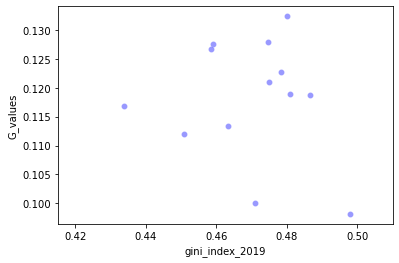

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a column for predictions
inequality_data['I'] = reg.predict(X)

# Plot G data vs gini_index
sns.scatterplot(data=inequality_data, x='gini_index_2019', y='G', color='blue', alpha=0.4)
plt.ylabel('G_values')
plt.xlim(0.415, 0.51)
plt.savefig('figures/gini_index_vs_G.png', dpi=100)
plt.show()

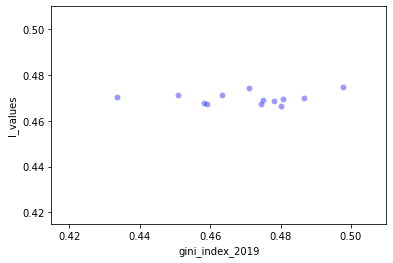

In [23]:
# Plot I data vs gini_index
sns.scatterplot(data=inequality_data, x='gini_index_2019', y='I', color='blue', alpha=0.4)
plt.ylabel('I_values')
plt.xlim(0.415, 0.51)
plt.ylim(0.415, 0.51)
plt.savefig('figures/gini_index_vs_I.png', dpi=100)
plt.show()